# Case - Aquisição de Clínicas
## Contexto

A Real constrói uma plataforma de trabalho (SaaS - Software as a Service) focada especificamente em clínicas odontológicas, onde os dentistas e proprietários de clínica encontram todos os serviços necessários para gerir suas operações. Nosso software oferece uma agenda moderna, prontuário eletrônico e ficha de pacientes, além de acesso a gestão financeira e muito mais!

Nosso fluxo de aquisição de novos clientes funciona assim:  o usuário pode se cadastrar diretamente ou pedir para conversar com um especialista antes disso. Uma vez cadastrado, ele tem acesso a um período de teste do produto (trial) onde pode usar todas as nossas funcionalidades antes de assinar. Uma vez terminado seu período de testes, ele só poderá usar o produto quando assinar. O foco deste case será entender o período de trial e como ele pode ser melhorado.
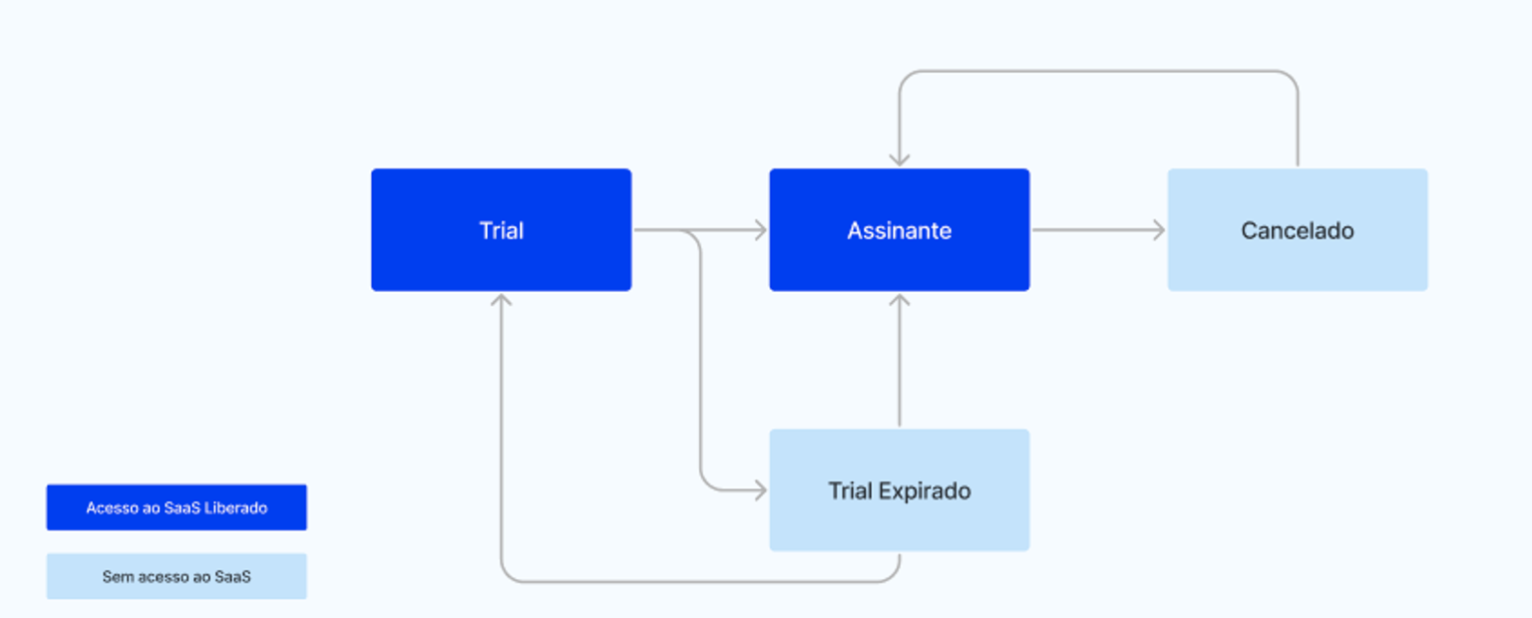

Uma das funcionalidades mais populares de nosso produto, e considerada um diferencial, é o Financiamento Real, onde a Real financia o tratamento de um paciente sem riscos para a clínica, e o paciente paga para a Real em até 36 vezes (basicamente funcionando como um empréstimo). Este produto também é conhecido internamente como Buy now, pay later (BNPL).

Desta forma, deve ser mencionada a existência do credenciamento. O processo de credenciamento é uma validação de identidade da clínica, que a Real faz antes de aprovar ela para o uso do nosso financiamento. É um processo anti-fraude e que nos permite avaliar de maneira mais assertiva os riscos de realizar financiamentos para clientes dessa clínica.

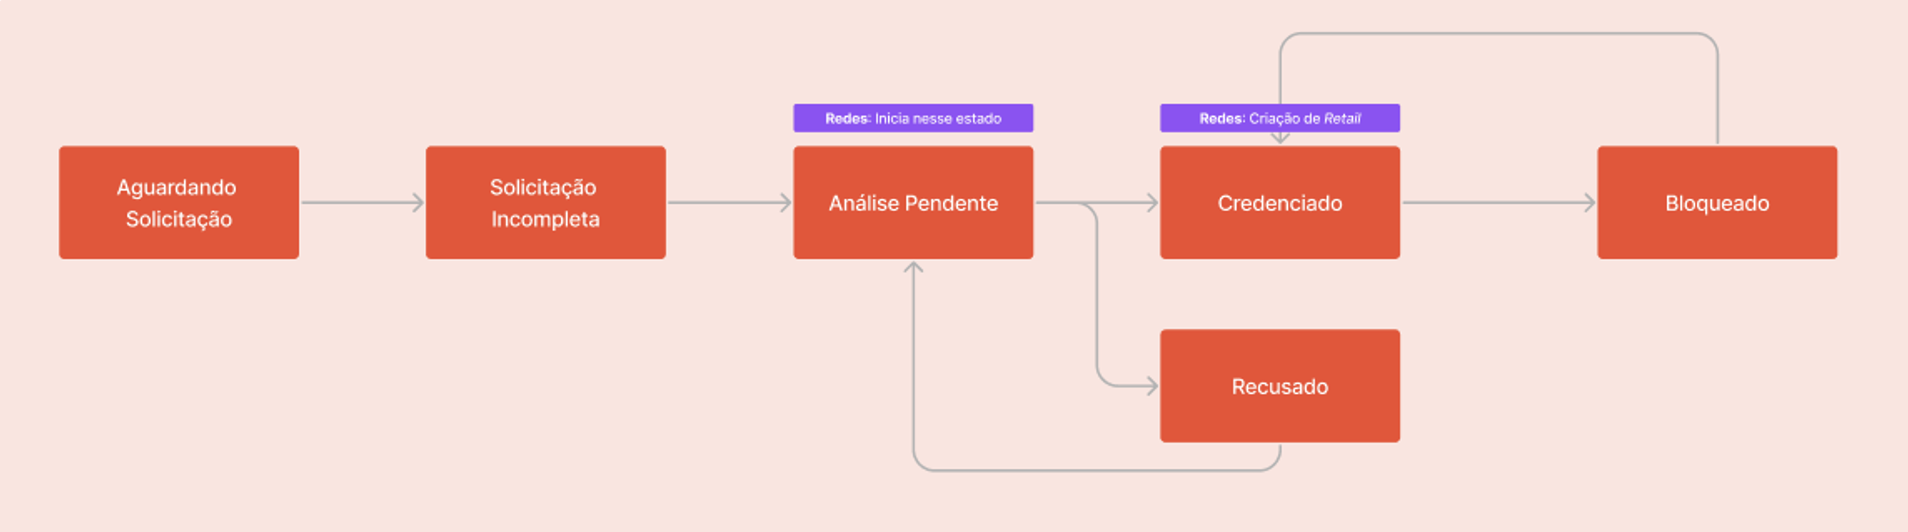

## O que precisa ser feito

1. Trazer as principais métricas relacionadas à aquisição de clínicas.
2. Realizar uma análise de dados exploratória com a base de dados afim de identificar gargalos e oportunidades para otimizar a entrada de clínicas na Real. 

## Sobre os dados:
São três datasets:

1. Clinics contém informações sobre as clínicas. Clínicas que usam apenas o Financiamente Real devem ser removidas
2. Subscriptions contém informações de assinaturas.
3. Activity registra todas as atividades realizadas pela clínica, contendo registros temporais de quando a clínica desempenhou uma determinada ação.

# Análise Exploratória dos Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Clinics

In [114]:
df_clinics = pd.read_csv('clinics (1).csv')
df_clinics.head()

,CLINIC_ID,CLINIC_CREATED_AT,BUSINESS_SEGMENTATION,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_REASONS,INTEREST_CATEGORY_SIGNUP,HAS_INTEREST_BNPL,HAS_INTEREST_BNPL_ONLY,HAS_INTEREST_SAAS,...,IS_PAID_MEDIUM,HAS_ASKED_FOR_ACCREDITATION,HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,CLINIC_ACCREDITATION_STATUS,REQUEST_FINISHED_AT,ACCREDITATION_REQUESTED_AT,ACCREDITATION_APPROVED_AT,ACCREDITATION_REJECTED_AT
0,8993,2023-08-01 06:25:16.121,Independente,False,Inbound,"[""bnpl"", ""finance_management"", ""patients_manag...",BNPL e SaaS,True,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
1,8994,2023-08-01 06:58:36.251,Independente,False,Inbound,"[""finance_management"", ""patients_management"", ...",BNPL e SaaS,True,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
2,8995,2023-08-01 06:59:23.156,Independente,False,Inbound,"[""bnpl""]",Apenas BNPL,True,True,False,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
3,8996,2023-08-01 08:03:38.557,Independente,False,Inbound,"[""calendar"", ""bnpl"", ""patients_management"", ""f...",BNPL e SaaS,True,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
4,8997,2023-08-01 08:34:33.894,Independente,False,Inbound,"[""patients_management""]",Apenas SaaS,False,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN


In [24]:
df_clinics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   CLINIC_ID                                   2219 non-null   int64 
 1   CLINIC_CREATED_AT                           2219 non-null   object
 2   BUSINESS_SEGMENTATION                       2219 non-null   object
 3   IS_CHAIN_CLINIC                             2219 non-null   bool  
 4   FIRST_USER_HUBSPOT_SOURCE                   2219 non-null   object
 5   INTEREST_REASONS                            2066 non-null   object
 6   INTEREST_CATEGORY_SIGNUP                    2219 non-null   object
 7   HAS_INTEREST_BNPL                           2219 non-null   bool  
 8   HAS_INTEREST_BNPL_ONLY                      2219 non-null   bool  
 9   HAS_INTEREST_SAAS                           2219 non-null   bool  
 10  TRIAL_DURATION          

In [25]:
df_clinics['HAS_ASKED_FOR_ACCREDITATION'].value_counts()

False    1531
True      688
Name: HAS_ASKED_FOR_ACCREDITATION, dtype: int64

In [26]:
df_clinics[['MARKETING_ATTRIBUITION', 'MARKETING_ATTRIBUITION_CHANNEL_GROUP',
            'MARKETING_ATTRIBUITION_CAMPAIGN', 'MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT',
           'MARKETING_ATTRIBUITION_AD_GROUP']].head()

,MARKETING_ATTRIBUITION,MARKETING_ATTRIBUITION_CHANNEL_GROUP,MARKETING_ATTRIBUITION_CAMPAIGN,MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT,MARKETING_ATTRIBUITION_AD_GROUP
0,Paid - meta,Paid - meta,meta_fce_bnpl,BNPL,interesses-validados
1,Paid - meta,Paid - meta,meta_signup_agenda,SaaS,interesses-validados
2,Paid - meta,Paid - meta,meta_fce_bnpl,BNPL,interesses-validados
3,Paid - meta,Paid - meta,meta_signup_agenda,SaaS,interesses-validados
4,Paid - meta,Paid - meta,meta_signup_bnpl_Antiga,SaaS,NaN


* Valores nulos em credenciamento se devem ao fato de não terem pedido o credenciamento.
* Data não está no formato datetime
* Existem colunas que talvez não sejam utilizadas no momento.

In [27]:
# Alterar o tipo da coluna data

df_clinics['CLINIC_CREATED_AT'] = pd.to_datetime(df_clinics['CLINIC_CREATED_AT'],dayfirst = False).dt.normalize()
df_clinics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   CLINIC_ID                                   2219 non-null   int64         
 1   CLINIC_CREATED_AT                           2219 non-null   datetime64[ns]
 2   BUSINESS_SEGMENTATION                       2219 non-null   object        
 3   IS_CHAIN_CLINIC                             2219 non-null   bool          
 4   FIRST_USER_HUBSPOT_SOURCE                   2219 non-null   object        
 5   INTEREST_REASONS                            2066 non-null   object        
 6   INTEREST_CATEGORY_SIGNUP                    2219 non-null   object        
 7   HAS_INTEREST_BNPL                           2219 non-null   bool          
 8   HAS_INTEREST_BNPL_ONLY                      2219 non-null   bool          
 9   HAS_INTE

In [28]:
df_clinics.groupby('CLINIC_CREATED_AT').count()

,CLINIC_ID,BUSINESS_SEGMENTATION,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_REASONS,INTEREST_CATEGORY_SIGNUP,HAS_INTEREST_BNPL,HAS_INTEREST_BNPL_ONLY,HAS_INTEREST_SAAS,TRIAL_DURATION,...,IS_PAID_MEDIUM,HAS_ASKED_FOR_ACCREDITATION,HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,CLINIC_ACCREDITATION_STATUS,REQUEST_FINISHED_AT,ACCREDITATION_REQUESTED_AT,ACCREDITATION_APPROVED_AT,ACCREDITATION_REJECTED_AT
CLINIC_CREATED_AT,,,,,,,,,,,,,,,,,,,,,
2023-08-01,65,65,65,65,61,65,65,65,65,65,...,65,65,65,65,65,25,14,14,12,2
2023-08-02,57,57,57,57,56,57,57,57,57,57,...,57,57,57,57,57,18,15,15,13,2
2023-08-03,52,52,52,52,44,52,52,52,52,52,...,52,52,52,52,52,18,18,18,11,7
2023-08-04,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,11,7,7,4,3
2023-08-05,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,8,6,6,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,49,49,49,49,41,49,49,49,49,49,...,49,49,49,49,49,27,21,21,17,4
2023-09-27,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,34,19,19,17,2
2023-09-28,46,46,46,46,41,46,46,46,46,46,...,46,46,46,46,46,31,22,22,16,6


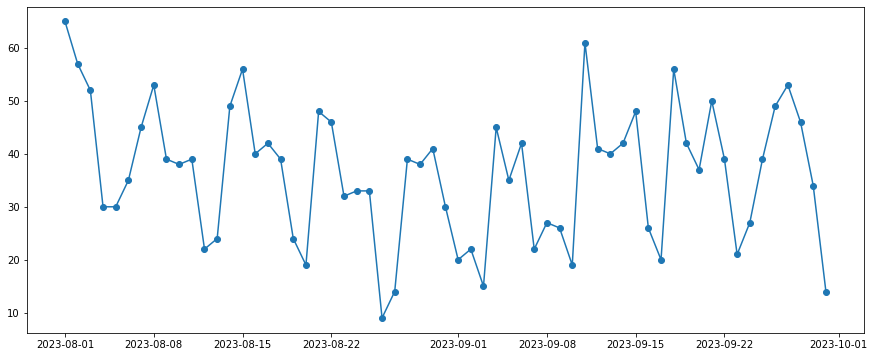

In [29]:
#ANALISANDO CONTAGEM DE CLINICAS CADASTRADAS POR DIA
x = df_clinics.groupby('CLINIC_CREATED_AT').count()['CLINIC_ID'].index
y = df_clinics.groupby('CLINIC_CREATED_AT').count()['CLINIC_ID'].values

plt.figure(figsize = (15, 6))
plt.plot(x, y)
plt.scatter(x, y)

In [104]:
df_clinics.groupby('CLINIC_CREATED_AT').count()['CLINIC_ID'].sum()

2219

* As entradas clínicas variam entre 60 a 10 no geral. Tendo 2219 clínica no total

In [31]:
# Tempo de trial Estudos
for i in ['TRIAL_START_DATE', 'TRIAL_END_DATE']:
    df_clinics[i] = pd.to_datetime(df_clinics[i],dayfirst = False)
df_clinics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   CLINIC_ID                                   2219 non-null   int64         
 1   CLINIC_CREATED_AT                           2219 non-null   datetime64[ns]
 2   BUSINESS_SEGMENTATION                       2219 non-null   object        
 3   IS_CHAIN_CLINIC                             2219 non-null   bool          
 4   FIRST_USER_HUBSPOT_SOURCE                   2219 non-null   object        
 5   INTEREST_REASONS                            2066 non-null   object        
 6   INTEREST_CATEGORY_SIGNUP                    2219 non-null   object        
 7   HAS_INTEREST_BNPL                           2219 non-null   bool          
 8   HAS_INTEREST_BNPL_ONLY                      2219 non-null   bool          
 9   HAS_INTE

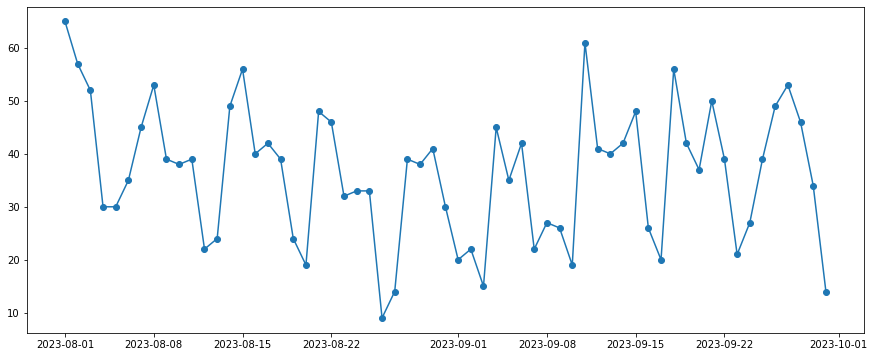

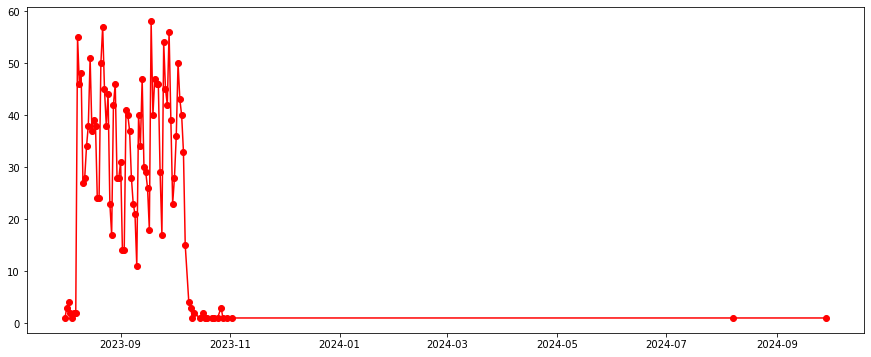

In [36]:
#
x = df_clinics.groupby('TRIAL_START_DATE').count()['CLINIC_ID'].index
y = df_clinics.groupby('TRIAL_START_DATE').count()['CLINIC_ID'].values

plt.figure(figsize = (15, 6))
plt.plot(x, y)
plt.scatter(x, y)

xx = df_clinics.groupby('TRIAL_END_DATE').count()['CLINIC_ID'].index
yy = df_clinics.groupby('TRIAL_END_DATE').count()['CLINIC_ID'].values

plt.figure(figsize = (15, 6))
plt.plot(xx, yy, color = 'red')
plt.scatter(xx, yy,color = 'red')

In [39]:
df_clinics['TRIAL_DURATION'].value_counts()

7      2043
10       20
0        19
11       13
15       12
13       11
14        8
30        7
16        5
21        5
9         5
17        4
20        4
24        4
22        4
26        3
50        3
25        3
45        3
8         3
66        3
12        2
19        2
34        2
38        2
31        2
40        2
365       2
43        2
27        1
69        1
29        1
23        1
5         1
18        1
65        1
52        1
47        1
60        1
42        1
41        1
46        1
71        1
81        1
28        1
55        1
36        1
92        1
51        1
1         1
Name: TRIAL_DURATION, dtype: int64

In [105]:
# QUANTIDADE DE CADA CATEGORIA DE INTERESSE
df_clinics[['HAS_INTEREST_BNPL', 'HAS_INTEREST_BNPL_ONLY','HAS_INTEREST_SAAS']].sum()*100/2219

HAS_INTEREST_BNPL         69.580892
HAS_INTEREST_BNPL_ONLY    39.567373
HAS_INTEREST_SAAS         53.492564
dtype: float64

* Maioria das clínicas tem interesse em BNPL (69.6%)
* Seguido por Interesse em SAAS (53.5%)

<AxesSubplot:xlabel='BUSINESS_SEGMENTATION', ylabel='count'>

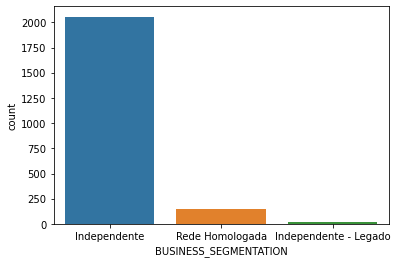

In [67]:
sns.countplot(data = df_clinics, x = 'BUSINESS_SEGMENTATION')

<AxesSubplot:xlabel='IS_CHAIN_CLINIC', ylabel='count'>

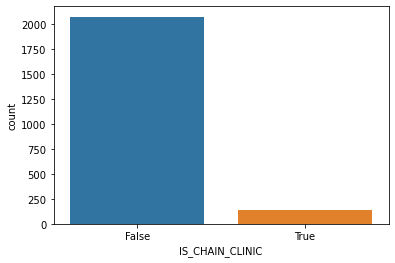

In [65]:
sns.countplot(data = df_clinics, x = 'IS_CHAIN_CLINIC')

In [98]:
df_clinics[['HAS_ASKED_FOR_ACCREDITATION', 'HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED',
            'IS_ACCREDITATION_APPROVED', 
            'IS_ACCREDITATION_REPROVED']].sum()

HAS_ASKED_FOR_ACCREDITATION                   688
HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED    270
IS_ACCREDITATION_APPROVED                     536
IS_ACCREDITATION_REPROVED                     151
dtype: int64

In [99]:
688+270+536+151

1645

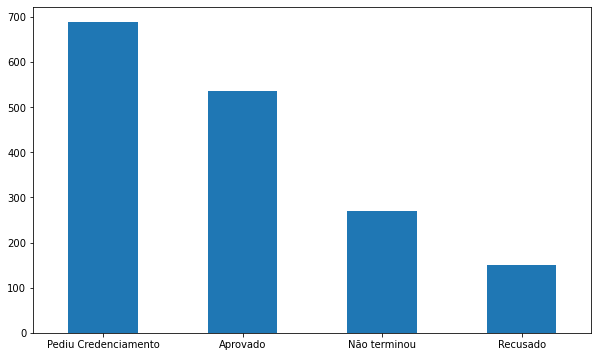

In [87]:
plt.figure(figsize=(10, 6))
df_clinics[['HAS_ASKED_FOR_ACCREDITATION', 'HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED',
            'IS_ACCREDITATION_APPROVED', 
            'IS_ACCREDITATION_REPROVED']].sum().sort_values(ascending = False).plot(kind = 'bar')

plt.xticks(rotation=0, ticks = range(4),
           labels = ['Pediu Credenciamento', 'Aprovado', 'Não terminou', 'Recusado'])
plt.show()

In [101]:
df_clinics['CLINIC_ACCREDITATION_STATUS'].value_counts()

Concluído                             521
Incompleta                            270
Reprovado                             151
Concluído - faltam dados bancários     15
Com pendência (fase 2)                  1
Name: CLINIC_ACCREDITATION_STATUS, dtype: int64

In [102]:
521+270+151+1

943

In [97]:
#ANALISANDO DURAÇÃO DO TESTE
df_clinics['TRIAL_DURATION'].describe()

count    2219.000000
mean        8.388463
std        12.314432
min         0.000000
25%         7.000000
50%         7.000000
75%         7.000000
max       365.000000
Name: TRIAL_DURATION, dtype: float64

* 75% do período de teste duram 7 dias.

(0.0, 60.0)

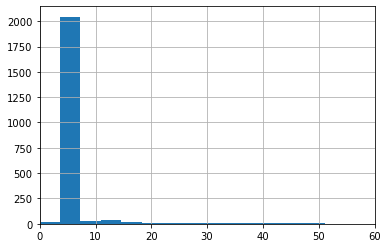

In [95]:
df_clinics['TRIAL_DURATION'].hist(bins = 100)
plt.xlim(0, 60)

#### activity

In [115]:
df_activity = pd.read_csv('activity (1).csv')
df_activity.head()

,CLINIC_ID,ACTIVITY_AT,ACTIVITY_TYPE,FEATURE,MODULE,ANALYTICS_DOMAIN,IS_TRANSACTION,IS_BNPL_ACTIVITY,IS_VALID_ACTIVITY,IS_DELETION_ACTIVITY,IS_MANAGEMENT_ACTIVITY,IS_FINANCE_ACTIVITY
0,9825,2023-08-24 18:46:47.733,patient_discarded,patient_management,patient,patient,False,False,True,True,True,False
1,9984,2023-08-24 19:41:43.497,patient_created,patient_management,patient,patient,False,False,False,False,True,False
2,9984,2023-08-24 19:41:44.037,time_slot_created,scheduling,schedule,scheduling,False,False,True,False,True,False
3,9984,2023-08-24 19:51:20.451,patient_created,patient_management,patient,patient,False,False,False,False,True,False
4,9984,2023-08-24 19:51:46.663,time_slot_created,scheduling,schedule,scheduling,False,False,True,False,True,False


### Dicionário da Tabela Activity:
Clinic_ID: ID da clínica

Activity_At: Data da atividade

Activiy_type: Tipo da atividade

Feature: Classe da atividade

Module: Módulo da atividade

Analytics_domain: Domínio de análise, a quem se refere a atividade.

Is_transaction: É transação ou não

Is_BNPL_Activity: Se é atividade de BNPL

Is_validy_activity: Se é uma atividade de validação.

Is_deletion_activity: Se é uma ação de deletar

Is_management_activity: Se é uma ação de manutenção

Is_finance_activity: Se é uma ação financeira


In [3]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13941 entries, 0 to 13940
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CLINIC_ID               13941 non-null  int64 
 1   ACTIVITY_AT             13941 non-null  object
 2   ACTIVITY_TYPE           13941 non-null  object
 3   FEATURE                 13941 non-null  object
 4   MODULE                  13941 non-null  object
 5   ANALYTICS_DOMAIN        13941 non-null  object
 6   IS_TRANSACTION          13941 non-null  bool  
 7   IS_BNPL_ACTIVITY        13941 non-null  bool  
 8   IS_VALID_ACTIVITY       13941 non-null  bool  
 9   IS_DELETION_ACTIVITY    13941 non-null  bool  
 10  IS_MANAGEMENT_ACTIVITY  13941 non-null  bool  
 11  IS_FINANCE_ACTIVITY     13941 non-null  bool  
dtypes: bool(6), int64(1), object(5)
memory usage: 735.3+ KB


In [9]:
for feature in df_activity.columns[2:]:
    print(feature)
    print(df_activity[feature].value_counts())

ACTIVITY_TYPE
patient_created                 3241
procedure_created               2516
pre_analysis                    2362
time_slot_created               2167
budget_created                   789
revenue_created                  466
anamnesis_created                407
expense_created                  271
time_slot_discarded              271
procedure_discarded              257
new_user_created                 238
observation_added                173
budget_discarded                 160
patient_discarded                144
folder_created                   120
request                           98
document_created                  77
basic_credit_check                38
prescription_created              35
anamnesis_template_created        28
time_slot_attendance_update       22
contract                          20
complete_credit_check             19
observation_discarded             10
anamnesis_template_discarded       9
payment_book_created               3
Name: ACTIVITY_TYPE, dty

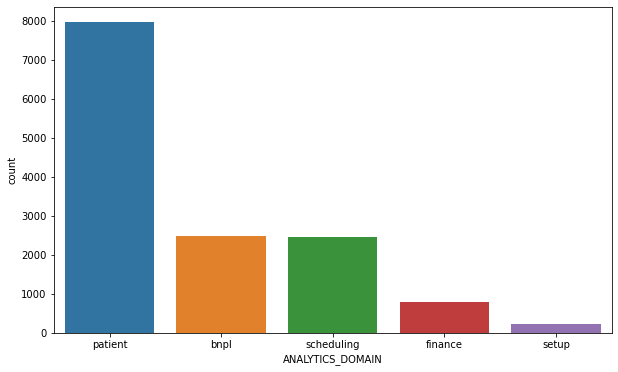

In [14]:
plt.figure(figsize = (10,6))
sns.countplot(data = df_activity, x = 'ANALYTICS_DOMAIN',
             order = ['patient','bnpl', 'scheduling','finance','setup',])
plt.show()

* Patient está em primeiro grande uso das clínicas
* BNPL é o segundo maior uso. 
1. Pergunta: As clínicas mais ativas foram as que completaram o cadastro?


In [19]:
df_activity.columns[-6:]

Index(['IS_TRANSACTION', 'IS_BNPL_ACTIVITY', 'IS_VALID_ACTIVITY',
       'IS_DELETION_ACTIVITY', 'IS_MANAGEMENT_ACTIVITY',
       'IS_FINANCE_ACTIVITY'],
      dtype='object')

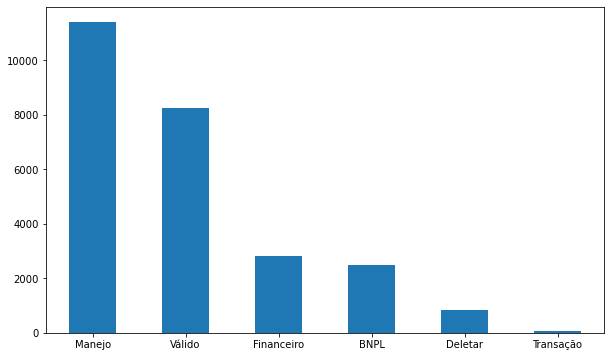

In [22]:
plt.figure(figsize=(10, 6))
df_activity[df_activity.columns[-6:]].sum().sort_values(ascending = False).plot(kind = 'bar')

plt.xticks(rotation=0, ticks = range(6),
           labels = ['Manejo', 'Válido', 'Financeiro', 'BNPL', 'Deletar','Transação'])
plt.show()

* TOP 3 características de atividade:
1. Manejo (Provavelmente de clientes)
2. Se a ação é válida
3. Atividades financeiras

#### subscriptions (2)

Clinic_ID: Id da clínica


Stripe_subscription_ID: ID da inscrição
Subscrition_start_date: Data que iniciou a inscrição

Subscription_end_Date: Data do fim da inscrição

Subscription_current_period_started_At: Data do início do período atual

Subscription_current_period_end_At: Data do fim do período atual

MOST_RECENT_INVOICE_CREATED_AT: Data da criação da última fatura

Las Payment at: Data do último pagamento

CHECKOUT_STATUS: Status do Checkout

SUBSCRIPTION_STATUS: Status da inscrição

BILLING_INTERVAL_IN_MONTHS: Intervalor de cobrança em meses

FIRST_PAYMENT_METHOD_TYPE: Primeiro tipo de método de pagamento

FIRST_CARD_BRAND: Primeiro brand do cartão

FIRST_PAYMENT_AMOUNT: Primeiro pagamento quantidade

FIRST_PAYMENT_AMOUNT_OFF: Primeira quantidade de desconto

FIRST_PAYMENT_PROMOTION_CODE: Primeiro código de promoção

FIRST_PAYMENT_COUPON_ID: Primeiro cupom utilizado

In [5]:
df_subs = pd.read_csv('subscriptions (2).csv')
df_subs.head()

,CLINIC_ID,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT,SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT,MOST_RECENT_INVOICE_CREATED_AT,LAST_PAYMENT_AT,CHECKOUT_STATUS,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_METHOD_TYPE,FIRST_CARD_BRAND,FIRST_PAYMENT_AMOUNT,FIRST_PAYMENT_AMOUNT_OFF,FIRST_PAYMENT_PROMOTION_CODE,FIRST_PAYMENT_COUPON_ID,FIRST_PAYMENT_AMOUNT_OFF_2
0,9000,sub_1NaOxzCpjOdJI4gTfqZ2epGB,2023-08-01,2023-10-01,2023-09-01 17:14:51.000,2023-10-01 17:14:51.000,2023-09-01 17:16:49.000,2023-09-01 18:17:14.000,complete,canceled,1.0,Cartão de Crédito,mastercard,89.9,NaN,NaN,NaN,NaN
1,9032,sub_1Namy7CpjOdJI4gTzrxPLlFg,2023-08-02,NaN,2023-10-02 18:52:35.000,2023-11-02 18:52:35.000,2023-10-02 18:53:31.000,2023-08-09 10:20:45.000,complete,past_due,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
2,9105,sub_1NalRdCpjOdJI4gTFRPqMhcv,2023-08-02,NaN,2023-10-02 17:14:57.000,2023-11-02 17:14:57.000,2023-10-02 17:16:56.000,2023-10-02 18:22:04.000,complete,active,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
3,9027,sub_1Nb3CECpjOdJI4gTFLOepcZD,2023-08-03,2023-09-03,2023-08-03 12:12:14.000,2023-09-03 12:12:14.000,2023-08-03 12:12:14.000,2023-08-03 12:12:16.000,complete,canceled,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
4,9072,sub_1Nb7E2CpjOdJI4gTsIJIy9b1,2023-08-03,2023-09-03,2023-08-03 16:30:22.000,2023-09-03 16:30:22.000,2023-08-03 16:30:22.000,2023-08-03 16:30:24.000,complete,canceled,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN


In [40]:
df_clinics[df_clinics['CLINIC_ID'] == 9000]

,CLINIC_ID,CLINIC_CREATED_AT,BUSINESS_SEGMENTATION,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_REASONS,INTEREST_CATEGORY_SIGNUP,HAS_INTEREST_BNPL,HAS_INTEREST_BNPL_ONLY,HAS_INTEREST_SAAS,...,IS_PAID_MEDIUM,HAS_ASKED_FOR_ACCREDITATION,HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,CLINIC_ACCREDITATION_STATUS,REQUEST_FINISHED_AT,ACCREDITATION_REQUESTED_AT,ACCREDITATION_APPROVED_AT,ACCREDITATION_REJECTED_AT
7,9000,2023-08-01,Independente,False,Inbound,"[""bnpl"", ""finance_management"", ""calendar"", ""pa...",BNPL e SaaS,True,False,True,...,False,False,True,False,False,Incompleta,NaN,NaN,NaN,NaN


In [3]:
df_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CLINIC_ID                               385 non-null    int64  
 1   STRIPE_SUBSCRIPTION_ID                  385 non-null    object 
 2   SUBSCRIPTION_START_DATE                 384 non-null    object 
 3   SUBSCRIPTION_END_DATE                   46 non-null     object 
 4   SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT  385 non-null    object 
 5   SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT     385 non-null    object 
 6   MOST_RECENT_INVOICE_CREATED_AT          385 non-null    object 
 7   LAST_PAYMENT_AT                         371 non-null    object 
 8   CHECKOUT_STATUS                         383 non-null    object 
 9   SUBSCRIPTION_STATUS                     383 non-null    object 
 10  BILLING_INTERVAL_IN_MONTHS              384 non-null    float6

In [6]:
colunas_data = ["SUBSCRIPTION_START_DATE", "SUBSCRIPTION_END_DATE","SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT",
"SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT" ,"MOST_RECENT_INVOICE_CREATED_AT"]

for coluna in colunas_data:
    df_subs[coluna] = pd.to_datetime(df_subs[coluna], dayfirst= False).dt.normalize()

In [7]:
df_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   CLINIC_ID                               385 non-null    int64         
 1   STRIPE_SUBSCRIPTION_ID                  385 non-null    object        
 2   SUBSCRIPTION_START_DATE                 384 non-null    datetime64[ns]
 3   SUBSCRIPTION_END_DATE                   46 non-null     datetime64[ns]
 4   SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT  385 non-null    datetime64[ns]
 5   SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT     385 non-null    datetime64[ns]
 6   MOST_RECENT_INVOICE_CREATED_AT          385 non-null    datetime64[ns]
 7   LAST_PAYMENT_AT                         371 non-null    object        
 8   CHECKOUT_STATUS                         383 non-null    object        
 9   SUBSCRIPTION_STATUS                     383 non-null  

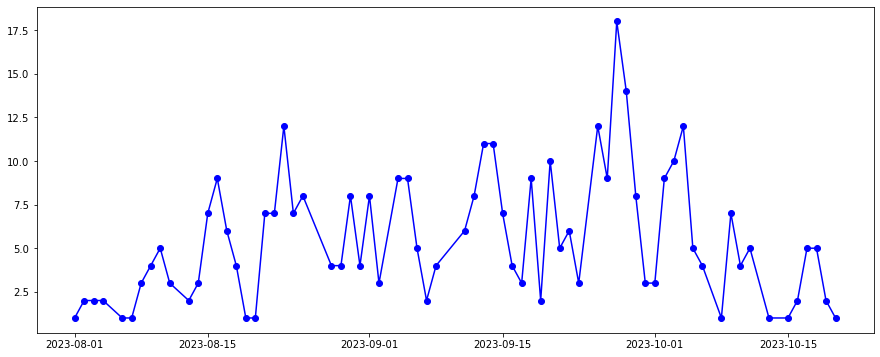

In [6]:
#ANALISANDO CONTAGEM DE INSCRIÇÕES POR DIA
x = df_subs.groupby('SUBSCRIPTION_START_DATE').count()['CLINIC_ID'].index
y = df_subs.groupby('SUBSCRIPTION_START_DATE').count()['CLINIC_ID'].values


plt.figure(figsize = (15, 6))
plt.plot(x, y, color = 'blue')
plt.scatter(x, y, color = 'blue')

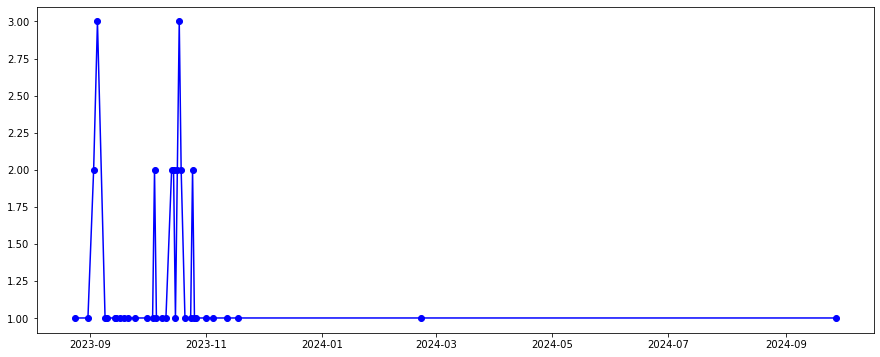

In [7]:
x = df_subs.groupby('SUBSCRIPTION_END_DATE').count()['CLINIC_ID'].index
y = df_subs.groupby('SUBSCRIPTION_END_DATE').count()['CLINIC_ID'].values


plt.figure(figsize = (15, 6))
plt.plot(x, y, color = 'blue')
plt.scatter(x, y, color = 'blue')

* Existem poucos dados referentes a fim do período de assinatura.
* Existem fins de assinatura até 1 ano seguinte. (Uma assinatura de um ano)

In [8]:
# Analisando o intervalo de cobrança
df_subs['BILLING_INTERVAL_IN_MONTHS'].describe()

count    384.000000
mean       3.763021
std        4.293244
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       12.000000
Name: BILLING_INTERVAL_IN_MONTHS, dtype: float64

In [9]:
df_subs['BILLING_INTERVAL_IN_MONTHS'].value_counts(normalize=True)

1.0     0.669271
12.0    0.184896
6.0     0.145833
Name: BILLING_INTERVAL_IN_MONTHS, dtype: float64

* 67% os clientes possuem assinatura mensal | 18% Anual | 15% Semestral

In [10]:
colunas_value_counts = ["CHECKOUT_STATUS","SUBSCRIPTION_STATUS","FIRST_PAYMENT_METHOD_TYPE"
]

for coluna in colunas_value_counts:
    print(coluna , "\n")
    
    print(df_subs[coluna].value_counts(normalize=True))
    print('\n')

CHECKOUT_STATUS 

complete    0.963446
open        0.036554
Name: CHECKOUT_STATUS, dtype: float64


SUBSCRIPTION_STATUS 

active        0.890339
canceled      0.083551
past_due      0.023499
incomplete    0.002611
Name: SUBSCRIPTION_STATUS, dtype: float64


FIRST_PAYMENT_METHOD_TYPE 

Cartão de Crédito    0.815104
Boleto               0.184896
Name: FIRST_PAYMENT_METHOD_TYPE, dtype: float64




* 8% das clínicas cancelaram. O que levam elas a cancelar?

In [14]:
df_subs["FIRST_PAYMENT_AMOUNT"].value_counts(normalize = True)*100

89.90     59.635417
479.40     9.375000
587.16     9.114583
838.80     6.250000
62.93      4.947917
383.52     3.385417
419.40     2.864583
335.58     1.562500
44.95      1.302083
71.92      0.781250
319.60     0.260417
79.90      0.260417
629.10     0.260417
Name: FIRST_PAYMENT_AMOUNT, dtype: float64

* 60% das clínicas assinantes começam com pagamento de 89.90

In [18]:
df_subs[['FIRST_PAYMENT_PROMOTION_CODE','FIRST_PAYMENT_COUPON_ID']].value_counts()

FIRST_PAYMENT_PROMOTION_CODE  FIRST_PAYMENT_COUPON_ID
ANUAL30                       YqXjKdhe                   25
CAPIM30                       oUu4Feil                   13
SEMESTRAL20                   TyuEUep5                   13
PREP50                        dV87G5C6                   10
PREP20                        cZ1wGhN0                    3
capim50                       5qATQ0hq                    2
clearcorrect12                0VmtjmCf                    1
clearcorrect6                 lcWaM4r6                    1
dtype: int64

In [21]:
df_subs[df_subs['FIRST_PAYMENT_PROMOTION_CODE'] == 'ANUAL30' ].head()

,CLINIC_ID,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT,SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT,MOST_RECENT_INVOICE_CREATED_AT,LAST_PAYMENT_AT,CHECKOUT_STATUS,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_METHOD_TYPE,FIRST_CARD_BRAND,FIRST_PAYMENT_AMOUNT,FIRST_PAYMENT_AMOUNT_OFF,FIRST_PAYMENT_PROMOTION_CODE,FIRST_PAYMENT_COUPON_ID,FIRST_PAYMENT_AMOUNT_OFF_2
107,9692,sub_1NkvQJCpjOdJI4gTww1ebTff,2023-08-30,NaT,2023-08-30,2024-08-30,2023-08-30,2023-08-30 17:55:38.000,complete,active,12.0,Cartão de Crédito,mastercard,587.16,NaN,ANUAL30,YqXjKdhe,NaN
114,9824,sub_1NlGDJCpjOdJI4gT0S9k0SOK,2023-08-31,NaT,2023-08-31,2024-08-31,2023-08-31,2023-09-02 04:01:56.000,complete,active,12.0,Boleto,NaN,587.16,NaN,ANUAL30,YqXjKdhe,NaN
115,9905,sub_1NlHPuCpjOdJI4gTCM9sO9ol,2023-08-31,NaT,2023-08-31,2024-08-31,2023-08-31,2023-08-31 17:24:41.000,complete,active,12.0,Cartão de Crédito,visa,587.16,NaN,ANUAL30,YqXjKdhe,NaN
119,9997,sub_1NlbdaCpjOdJI4gT6B1VMvhj,2023-09-01,NaT,2023-09-01,2024-09-01,2023-09-01,2023-09-01 16:10:51.000,complete,active,12.0,Boleto,NaN,587.16,NaN,ANUAL30,YqXjKdhe,NaN
141,10265,sub_1Nn6N6CpjOdJI4gTFA3TF2vb,2023-09-05,NaT,2023-09-05,2024-09-05,2023-09-05,2023-09-05 19:42:09.000,complete,active,12.0,Boleto,NaN,587.16,NaN,ANUAL30,YqXjKdhe,NaN


In [20]:
df_subs[['FIRST_PAYMENT_PROMOTION_CODE']].value_counts()

FIRST_PAYMENT_PROMOTION_CODE
ANUAL30                         25
CAPIM30                         13
SEMESTRAL20                     13
PREP50                          10
PREP20                           3
capim50                          2
clearcorrect12                   1
clearcorrect6                    1
dtype: int64

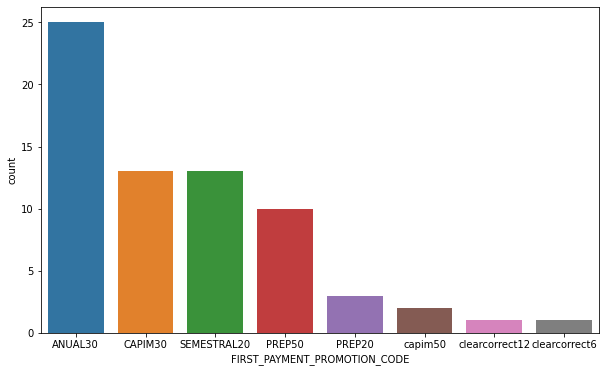

In [22]:
plt.figure(figsize = (10,6))
sns.countplot(data = df_subs, x = 'FIRST_PAYMENT_PROMOTION_CODE',
             order = ['ANUAL30','CAPIM30', 'SEMESTRAL20','PREP50','PREP20','capim50',
                     'clearcorrect12','clearcorrect6'])
plt.show()

### Seleção de Métricas: Quero focar no trial e no que leva do trial para assinatura
-> Estudando as clínicas e suas motivações
1. Quantas clínicas entraram neste período?
2. Quais os interesses destas clínicas?
3. Tempo médio de trial destas clínicas?
4. Quantas pediram pelo credenciamento? 
5. Como está o status do credenciamento?
-> Estudando as métricas
1. Quantas foram convertidas do trial para assinantes? Taxa de conversão
2. Tempo de trial das clínicas Assinantes.Tempo de ciclo
3. Taxa de retenção de assinantes. Compreender o motivo de saída de clínicas pode ser o argumento para aumentar a taxa de conversão
4. Quantas atividades são feitas por dia?

-> Estudando hipóteses
1. Clínicas com mais atividades são as que assinaram? 
2. Clínicas assinantes tiveram credenciamento feito?



# Entregáveis
## Modelo de dados

Para construir o modelo usei como base as perguntas e métricas que buscarei responder. Selecionei as colunas necessárias para realizar os gráficos planejados, calcular as métricas e fazer os testes de hipóteses. Adicionei features complementares às escolhidas para manter um design completo. 

O modelo lógico segue abaixo:

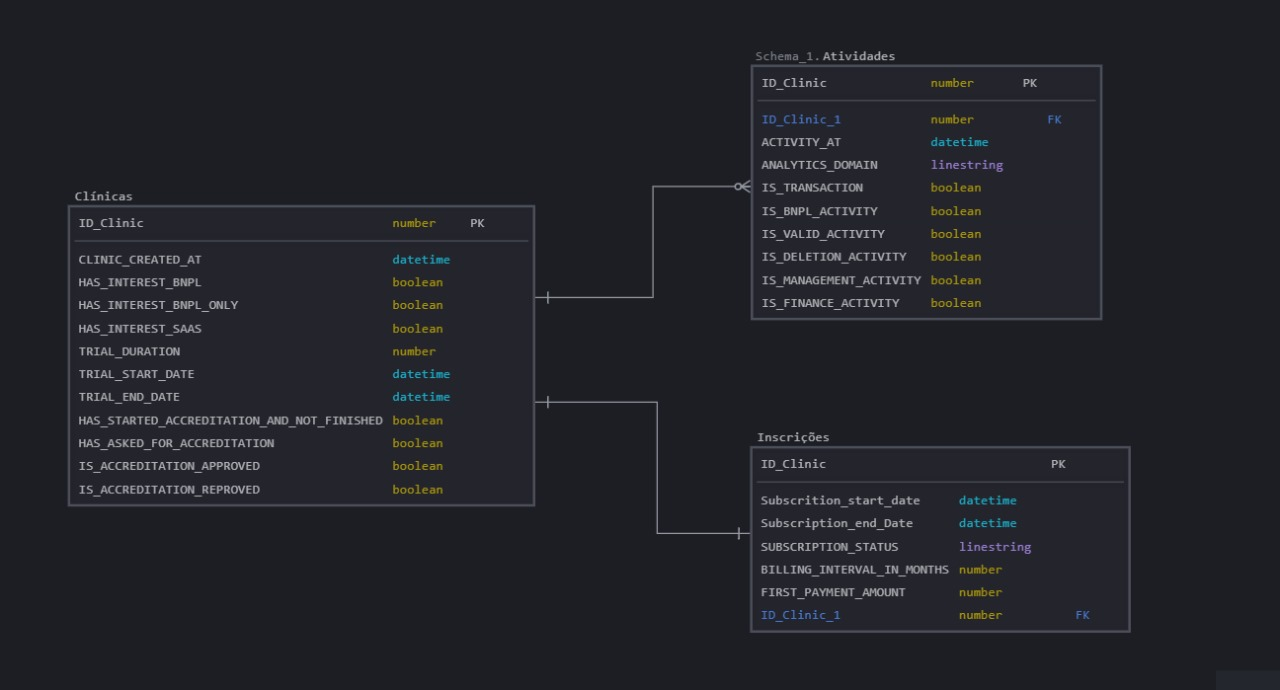

Abaixo irei fazer a organização dos dataset para estar do jeito criado no modelo

### Tabela Clínicas

In [117]:
#Fazendo a Cópia
tabela_clinicas = df_clinics[[
    'CLINIC_ID','CLINIC_CREATED_AT','HAS_INTEREST_BNPL',
       'HAS_INTEREST_BNPL_ONLY', 'HAS_INTEREST_SAAS','TRIAL_DURATION',
       'TRIAL_START_DATE', 'TRIAL_END_DATE','HAS_ASKED_FOR_ACCREDITATION',
       'HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED',
       'IS_ACCREDITATION_APPROVED', 'IS_ACCREDITATION_REPROVED', 'IS_CHAIN_CLINIC', 'BUSINESS_SEGMENTATION']].copy()

tabela_clinicas.head()

,CLINIC_ID,CLINIC_CREATED_AT,HAS_INTEREST_BNPL,HAS_INTEREST_BNPL_ONLY,HAS_INTEREST_SAAS,TRIAL_DURATION,TRIAL_START_DATE,TRIAL_END_DATE,HAS_ASKED_FOR_ACCREDITATION,HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,IS_CHAIN_CLINIC,BUSINESS_SEGMENTATION
0,8993,2023-08-01 06:25:16.121,True,False,True,7,2023-08-01,2023-08-08,False,False,False,False,False,Independente
1,8994,2023-08-01 06:58:36.251,True,False,True,7,2023-08-01,2023-08-08,False,False,False,False,False,Independente
2,8995,2023-08-01 06:59:23.156,True,True,False,7,2023-08-01,2023-08-08,False,False,False,False,False,Independente
3,8996,2023-08-01 08:03:38.557,True,False,True,7,2023-08-01,2023-08-08,False,False,False,False,False,Independente
4,8997,2023-08-01 08:34:33.894,False,False,True,7,2023-08-01,2023-08-08,False,False,False,False,False,Independente


In [118]:
#Retirando Redes Homologadas
tabela_clinicas = tabela_clinicas[tabela_clinicas['BUSINESS_SEGMENTATION'] != 'Rede Homologada']
#Retirando Franquias
tabela_clinicas = tabela_clinicas[tabela_clinicas['IS_CHAIN_CLINIC'] == False]
tabela_clinicas.head()

,CLINIC_ID,CLINIC_CREATED_AT,HAS_INTEREST_BNPL,HAS_INTEREST_BNPL_ONLY,HAS_INTEREST_SAAS,TRIAL_DURATION,TRIAL_START_DATE,TRIAL_END_DATE,HAS_ASKED_FOR_ACCREDITATION,HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,IS_CHAIN_CLINIC,BUSINESS_SEGMENTATION
0,8993,2023-08-01 06:25:16.121,True,False,True,7,2023-08-01,2023-08-08,False,False,False,False,False,Independente
1,8994,2023-08-01 06:58:36.251,True,False,True,7,2023-08-01,2023-08-08,False,False,False,False,False,Independente
2,8995,2023-08-01 06:59:23.156,True,True,False,7,2023-08-01,2023-08-08,False,False,False,False,False,Independente
3,8996,2023-08-01 08:03:38.557,True,False,True,7,2023-08-01,2023-08-08,False,False,False,False,False,Independente
4,8997,2023-08-01 08:34:33.894,False,False,True,7,2023-08-01,2023-08-08,False,False,False,False,False,Independente


In [119]:
tabela_clinicas.drop(columns = ['BUSINESS_SEGMENTATION','IS_CHAIN_CLINIC'], axis = 1, inplace = True)
tabela_clinicas.head()

,CLINIC_ID,CLINIC_CREATED_AT,HAS_INTEREST_BNPL,HAS_INTEREST_BNPL_ONLY,HAS_INTEREST_SAAS,TRIAL_DURATION,TRIAL_START_DATE,TRIAL_END_DATE,HAS_ASKED_FOR_ACCREDITATION,HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED
0,8993,2023-08-01 06:25:16.121,True,False,True,7,2023-08-01,2023-08-08,False,False,False,False
1,8994,2023-08-01 06:58:36.251,True,False,True,7,2023-08-01,2023-08-08,False,False,False,False
2,8995,2023-08-01 06:59:23.156,True,True,False,7,2023-08-01,2023-08-08,False,False,False,False
3,8996,2023-08-01 08:03:38.557,True,False,True,7,2023-08-01,2023-08-08,False,False,False,False
4,8997,2023-08-01 08:34:33.894,False,False,True,7,2023-08-01,2023-08-08,False,False,False,False


In [120]:
#Transformando em datetime
for i in ['CLINIC_CREATED_AT', 'TRIAL_START_DATE', 'TRIAL_END_DATE']:
    tabela_clinicas[i] = pd.to_datetime(tabela_clinicas[i],dayfirst = False).dt.normalize()
tabela_clinicas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2218
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   CLINIC_ID                                   2076 non-null   int64         
 1   CLINIC_CREATED_AT                           2076 non-null   datetime64[ns]
 2   HAS_INTEREST_BNPL                           2076 non-null   bool          
 3   HAS_INTEREST_BNPL_ONLY                      2076 non-null   bool          
 4   HAS_INTEREST_SAAS                           2076 non-null   bool          
 5   TRIAL_DURATION                              2076 non-null   int64         
 6   TRIAL_START_DATE                            2076 non-null   datetime64[ns]
 7   TRIAL_END_DATE                              2076 non-null   datetime64[ns]
 8   HAS_ASKED_FOR_ACCREDITATION                 2076 non-null   bool          
 9   HAS_STAR

In [121]:
#Salvar
tabela_clinicas.to_csv('tabela_clinicas.csv', index = False)

### Tabela Atividades

In [122]:
tabela_atividades = df_activity[['CLINIC_ID', 'ACTIVITY_AT','ANALYTICS_DOMAIN','IS_TRANSACTION', 'IS_BNPL_ACTIVITY',
       'IS_VALID_ACTIVITY', 'IS_DELETION_ACTIVITY', 'IS_MANAGEMENT_ACTIVITY',
       'IS_FINANCE_ACTIVITY']].copy()

tabela_atividades.head()

,CLINIC_ID,ACTIVITY_AT,ANALYTICS_DOMAIN,IS_TRANSACTION,IS_BNPL_ACTIVITY,IS_VALID_ACTIVITY,IS_DELETION_ACTIVITY,IS_MANAGEMENT_ACTIVITY,IS_FINANCE_ACTIVITY
0,9825,2023-08-24 18:46:47.733,patient,False,False,True,True,True,False
1,9984,2023-08-24 19:41:43.497,patient,False,False,False,False,True,False
2,9984,2023-08-24 19:41:44.037,scheduling,False,False,True,False,True,False
3,9984,2023-08-24 19:51:20.451,patient,False,False,False,False,True,False
4,9984,2023-08-24 19:51:46.663,scheduling,False,False,True,False,True,False


In [123]:
tabela_atividades['ACTIVITY_AT'] = pd.to_datetime(tabela_atividades['ACTIVITY_AT'],dayfirst = False).dt.normalize()
tabela_atividades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13941 entries, 0 to 13940
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CLINIC_ID               13941 non-null  int64         
 1   ACTIVITY_AT             13941 non-null  datetime64[ns]
 2   ANALYTICS_DOMAIN        13941 non-null  object        
 3   IS_TRANSACTION          13941 non-null  bool          
 4   IS_BNPL_ACTIVITY        13941 non-null  bool          
 5   IS_VALID_ACTIVITY       13941 non-null  bool          
 6   IS_DELETION_ACTIVITY    13941 non-null  bool          
 7   IS_MANAGEMENT_ACTIVITY  13941 non-null  bool          
 8   IS_FINANCE_ACTIVITY     13941 non-null  bool          
dtypes: bool(6), datetime64[ns](1), int64(1), object(1)
memory usage: 408.6+ KB


In [125]:
# Salvar
tabela_atividades.to_csv('tabela_atividades.csv', index = False)

### Tabela Assinaturas

In [5]:
df_subs.columns

Index(['CLINIC_ID', 'STRIPE_SUBSCRIPTION_ID', 'SUBSCRIPTION_START_DATE',
       'SUBSCRIPTION_END_DATE', 'SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT',
       'SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT', 'MOST_RECENT_INVOICE_CREATED_AT',
       'LAST_PAYMENT_AT', 'CHECKOUT_STATUS', 'SUBSCRIPTION_STATUS',
       'BILLING_INTERVAL_IN_MONTHS', 'FIRST_PAYMENT_METHOD_TYPE',
       'FIRST_CARD_BRAND', 'FIRST_PAYMENT_AMOUNT', 'FIRST_PAYMENT_AMOUNT_OFF',
       'FIRST_PAYMENT_PROMOTION_CODE', 'FIRST_PAYMENT_COUPON_ID',
       'FIRST_PAYMENT_AMOUNT_OFF_2'],
      dtype='object')

In [8]:
tabela_assinaturas = df_subs[['CLINIC_ID','SUBSCRIPTION_START_DATE',
       'SUBSCRIPTION_END_DATE','SUBSCRIPTION_STATUS',
       'BILLING_INTERVAL_IN_MONTHS','FIRST_PAYMENT_AMOUNT']].copy()

In [9]:
#Transformando em datetime
for i in ['SUBSCRIPTION_START_DATE', 'SUBSCRIPTION_END_DATE']:
    tabela_assinaturas[i] = pd.to_datetime(tabela_assinaturas[i],dayfirst = False).dt.normalize()
tabela_assinaturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CLINIC_ID                   385 non-null    int64         
 1   SUBSCRIPTION_START_DATE     384 non-null    datetime64[ns]
 2   SUBSCRIPTION_END_DATE       46 non-null     datetime64[ns]
 3   SUBSCRIPTION_STATUS         383 non-null    object        
 4   BILLING_INTERVAL_IN_MONTHS  384 non-null    float64       
 5   FIRST_PAYMENT_AMOUNT        384 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 18.2+ KB


In [10]:
tabela_assinaturas['FIRST_PAYMENT_AMOUNT'].value_counts()

89.90     229
479.40     36
587.16     35
838.80     24
62.93      19
383.52     13
419.40     11
335.58      6
44.95       5
71.92       3
319.60      1
79.90       1
629.10      1
Name: FIRST_PAYMENT_AMOUNT, dtype: int64

In [9]:
#Salvar
tabela_assinaturas.to_csv('tabela_assinaturas.csv', index = False)

In [13]:
tabela_assinaturas.to_excel('tabela_assinaturas.xlsx', index = False)

In [132]:
tabela_assinaturas['CLINIC_ID'].value_counts()

10358    2
9017     2
9000     1
10293    1
10107    1
        ..
10241    1
10157    1
10138    1
9935     1
10979    1
Name: CLINIC_ID, Length: 383, dtype: int64

In [138]:
tabela_assinaturas[tabela_assinaturas['CLINIC_ID'] == 10358]

,CLINIC_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_AMOUNT
196,10358,2023-09-15,2023-10-18,NaN,1.0,89.9
379,10358,2023-10-18,NaT,active,1.0,89.9


# Respondendo Perguntas e Cuidando do Dashboard

-> Estudando as clínicas e suas motivações
1. Quantas clínicas entraram neste período?
2. Quais os interesses destas clínicas?
3. Tempo médio de trial destas clínicas?
4. Quantas pediram pelo credenciamento? 
5. Como está o status do credenciamento?
-> Estudando as métricas
1. Quantas foram convertidas do trial para assinantes? Taxa de conversão
2. Tempo de trial das clínicas Assinantes.Tempo de ciclo
3. Taxa de retenção de assinantes. Compreender o motivo de saída de clínicas pode ser o argumento para aumentar a taxa de conversão
4. Quantas atividades são feitas por dia?

-> Estudando hipóteses
1. Clínicas com mais atividades são as que assinaram? 
2. Clínicas assinantes tiveram credenciamento feito?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tabela_clinicas = pd.read_csv('tabela_clinicas.csv')
tabela_atividades = pd.read_csv('tabela_atividades.csv')
tabela_assinaturas = pd.read_csv('tabela_assinaturas.csv')

In [2]:
# Quantas Clínicas Entrarm neste período: 2076 Clínicas Independentes
len(tabela_clinicas.CLINIC_ID)

2076

In [3]:
#Quais os interesses das clínicas?
interesses = tabela_clinicas[['HAS_INTEREST_BNPL', 'HAS_INTEREST_BNPL_ONLY','HAS_INTEREST_SAAS']].sum()*100/2076
interesses = pd.DataFrame(interesses.sort_values(ascending = False))
interesses


,0
HAS_INTEREST_BNPL,73.265896
HAS_INTEREST_SAAS,57.080925
HAS_INTEREST_BNPL_ONLY,41.184971


In [139]:
interesses = tabela_clinicas[['HAS_INTEREST_BNPL', 'HAS_INTEREST_BNPL_ONLY','HAS_INTEREST_SAAS']].sum()
interesses

HAS_INTEREST_BNPL         1521
HAS_INTEREST_BNPL_ONLY     855
HAS_INTEREST_SAAS         1185
dtype: int64

In [4]:
def barras_contagem(tabela, titulo, cores, altera_ticks = False):
    plt.figure(figsize = (10, 6))
    ax = sns.barplot( data = tabela, y = tabela.index, x = 0, palette = cores, width = 0.5)

    plt.suptitle(titulo, fontsize = 16, y = 0.99)
    plt.ylabel('', fontsize = 13)
    
    if altera_ticks != False:
            
        ax.set_yticklabels(altera_ticks)
        
    plt.gca().get_xaxis().set_visible(False)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_color('none')  # Remove a borda inferior (eixo x)
    ax.spines['left'].set_color('none')
    plt.margins(x=0.1)

    for i, barra in enumerate(ax.patches):
        valor = round(tabela[0].iloc[i],2)
        largura_barra = barra.get_width()
        ax.text(largura_barra +1 , barra.get_y() + barra.get_height() / 2, f'{valor}', va='center')
    plt.show()

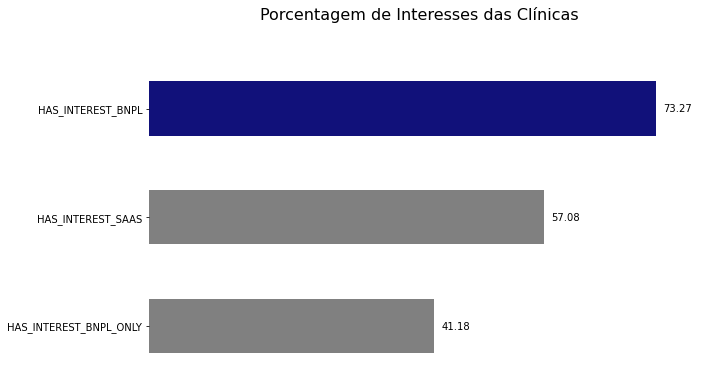

In [5]:
barras_contagem(interesses,'Porcentagem de Interesses das Clínicas',['darkblue', 'gray', 'gray'])

In [6]:
#Tempo médio de trial destas clínicas?
round(tabela_clinicas['TRIAL_DURATION'].mean(), 0)

8.0

In [7]:
#Quantas pediram pelo credenciamento?
round(tabela_clinicas['HAS_ASKED_FOR_ACCREDITATION'].sum()*100/2076,2)

26.49

In [8]:
tabela_clinicas.columns

Index(['CLINIC_ID', 'CLINIC_CREATED_AT', 'HAS_INTEREST_BNPL',
       'HAS_INTEREST_BNPL_ONLY', 'HAS_INTEREST_SAAS', 'TRIAL_DURATION',
       'TRIAL_START_DATE', 'TRIAL_END_DATE', 'HAS_ASKED_FOR_ACCREDITATION',
       'HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED',
       'IS_ACCREDITATION_APPROVED', 'IS_ACCREDITATION_REPROVED'],
      dtype='object')

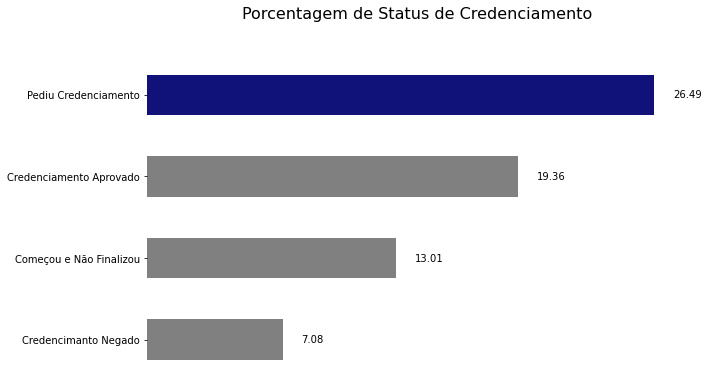

In [9]:
#Como está o status do credenciamento?
status_credenciamento = tabela_clinicas[['HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED',
       'IS_ACCREDITATION_APPROVED', 'IS_ACCREDITATION_REPROVED','HAS_ASKED_FOR_ACCREDITATION']].sum()*100/2076
status_credenciamento = pd.DataFrame(status_credenciamento.sort_values(ascending = False))

barras_contagem(status_credenciamento, 'Porcentagem de Status de Credenciamento', 
                ['darkblue', 'gray', 'gray','gray'], 
               ['Pediu Credenciamento','Credenciamento Aprovado', 'Começou e Não Finalizou', 'Credencimanto Negado'])

In [17]:
#Quantas foram convertidas do trial para assinantes? Taxa de conversão
ID_assinantes = tabela_assinaturas['CLINIC_ID'].values
round(len(ID_assinantes)/2076 *100,2)

18.55

In [20]:
#Tempo de trial das clínicas Assinantes.Tempo de ciclo
tabela_clinicas[ tabela_clinicas['CLINIC_ID'].isin(ID_assinantes)]['TRIAL_DURATION'].median()

7.0

In [34]:
#Taxa de retenção de assinantes
ass_canceladas = tabela_assinaturas.query('SUBSCRIPTION_STATUS == "canceled"').copy()
round(len(ass_canceladas)*100/len(tabela_assinaturas),2)

8.31

In [35]:
#Tempo de Assinatura dos Evasores
for i in ['SUBSCRIPTION_START_DATE', 'SUBSCRIPTION_END_DATE']:
    ass_canceladas[i] = pd.to_datetime(ass_canceladas[i],dayfirst = False)
ass_canceladas['tempo_assinatura'] = (ass_canceladas['SUBSCRIPTION_END_DATE'] - ass_canceladas['SUBSCRIPTION_START_DATE']).dt.days
ass_canceladas['tempo_assinatura'].describe()

#A mediana dos evasores levam 36 dias para evadirem.
# 75% dos evasores evadem com menos de 37 dias.

count    32.000000
mean     34.812500
std      18.591426
min       1.000000
25%      29.500000
50%      36.000000
75%      37.000000
max      67.000000
Name: tempo_assinatura, dtype: float64

In [58]:
np.median(y)

178.0

Text(0.5, 1.0, 'Quantidade de Atividades por Dia')

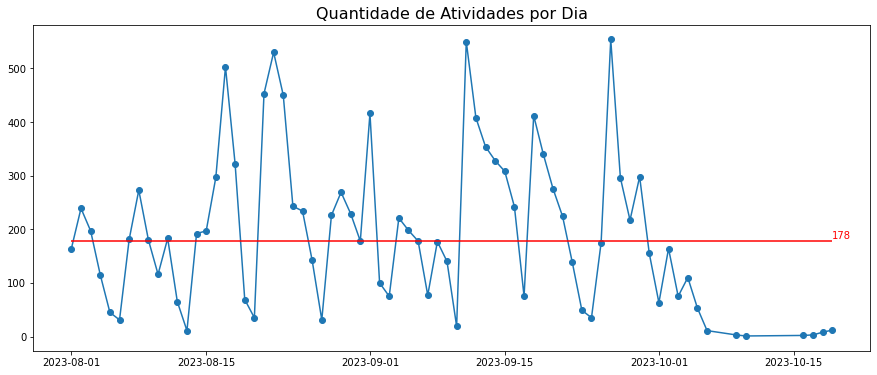

In [72]:
#Quantas atividades são feitas por dia?
tabela_atividades['ACTIVITY_AT'] = pd.to_datetime(tabela_atividades['ACTIVITY_AT'],dayfirst = False).dt.normalize()
atividades_por_dia = tabela_atividades.groupby(by = 'ACTIVITY_AT').count()['CLINIC_ID']
x = atividades_por_dia.index
y = atividades_por_dia.values

#Tirando Mediana da quantidade de atividades
mediana_y = np.median(y)


plt.figure(figsize = (15, 6))
plt.plot(x, y)
plt.scatter(x, y)
plt.hlines(mediana_y, xmin = x[0], xmax = x[-1], colors = 'red')
plt.text(x = x[-1], y = mediana_y + 5,s =  '178', color = 'red')

plt.title('Quantidade de Atividades por Dia', fontsize = 16)


In [81]:
#Clínicas com mais atividades são as que assinaram?
atividades_ass = tabela_atividades[tabela_atividades['CLINIC_ID'].isin(ID_assinantes)]
atividades_n_ass = tabela_atividades[~tabela_atividades['CLINIC_ID'].isin(ID_assinantes)]
print(len(atividades_ass), len(atividades_n_ass))

7590 6351


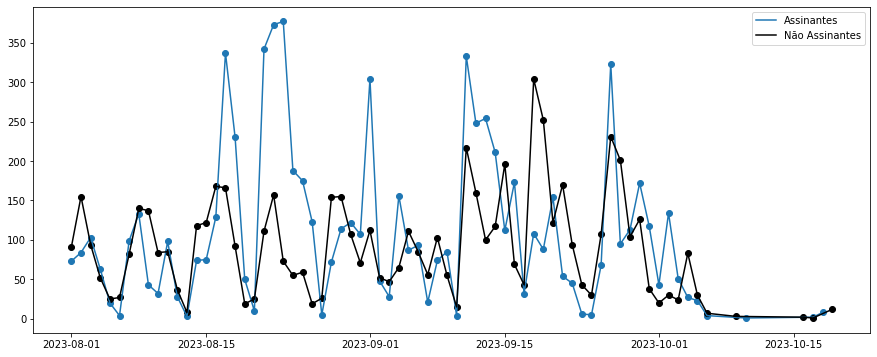

In [99]:
atividades_por_dia_ass = atividades_ass.groupby(by = 'ACTIVITY_AT').count()['CLINIC_ID']
x = atividades_por_dia_ass.index
y = atividades_por_dia_ass.values

atividades_por_dia_nass = atividades_n_ass.groupby(by = 'ACTIVITY_AT').count()['CLINIC_ID']
xn = atividades_por_dia_nass.index
yn = atividades_por_dia_nass.values

plt.figure(figsize = (15, 6))
plt.plot(x, y) #Linha dos Assinantes
plt.plot(xn, yn, color = 'black') #Linha Não assinantes

plt.scatter(x, y) #Pontos Assinantes
plt.scatter(xn, yn,color = 'black') #Pontos Não assinantes

plt.legend(['Assinantes', 'Não Assinantes'])

H0 -> A quantidade de usos por dia dos assinantes e não assinantes são iguais

H1 - > A quantidade de usos por dia dos assinantes e não assinantes são diferentes

Vou utilizar a mediana para fazer este cálculo, fazendo um teste não paramétrico. Será importante lembrando que são dados quantidades de dados diferentes

In [102]:
from scipy.stats import mannwhitneyu

significancia = 0.05
u, p_valor = mannwhitneyu(yn, y, alternative = 'greater')
p_valor <= significancia
if p_valor <= significancia:
  print('Rejeitar hipótese Nula')
else: 
  print('Não Rejeitar hipótese Nula')

Não Rejeitar hipótese Nula


In [111]:
#Clínicas assinantes tiveram credenciamento feito?
clinicas_ass = tabela_clinicas[tabela_clinicas['CLINIC_ID'].isin(ID_assinantes)]
T_ass = clinicas_ass['HAS_ASKED_FOR_ACCREDITATION'].value_counts(normalize = True)

clinicas_nass = tabela_clinicas[~tabela_clinicas['CLINIC_ID'].isin(ID_assinantes)]
T_nass = clinicas_nass['HAS_ASKED_FOR_ACCREDITATION'].value_counts(normalize = True)

print(T_ass[1], T_nass[1])

0.800524934383202 0.14454277286135694


In [112]:
T_ass

True     0.800525
False    0.199475
Name: HAS_ASKED_FOR_ACCREDITATION, dtype: float64

In [113]:
T_nass

False    0.855457
True     0.144543
Name: HAS_ASKED_FOR_ACCREDITATION, dtype: float64

* Clínicas Assinantes geralmente pedem pelo credenciamente. Fazer o credenciamento pode fazer com que mais clínicas assinem.

In [19]:
len(tabela_assinaturas)

385